In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 70

xc = n/2
yc = n/2

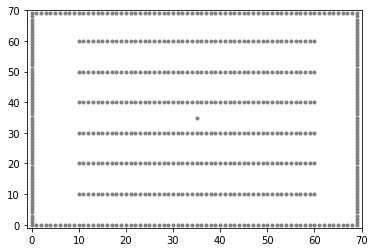

In [2]:
def is_exit(position): # test if position is an absorption site (set A union B)
    i, j = position
    return (i == 0 or j == 0 or i == n-1 or j == n-1
            or j % 10 == 0 and 10 <= i <= 60
            or is_good_exit(position))

def is_good_exit(position): # test if position is a good absorption site (the set A)
    i, j = position
    return i == xc and j == yc



plt.xlim(-1,n)
plt.ylim(-1,n)
plt.scatter([i for i in range(n) for j in range(n) if is_exit( (i,j) )],
            [j for i in range(n) for j in range(n) if is_exit( (i,j) )],
            color='grey', marker='.'
           )
plt.show()

In [3]:



P = np.zeros( (n,n,n,n) )  # transition probabilities of the unconditional chain
for i in range(n):
    for j in range(n): 
        if not(is_exit( (i,j) )):
            for possible_move in [(i+1,j), (i+1, j+1), (i, j+1),
                                  (i-1,j+1), (i-1,j), (i-1,j-1),
                                  (i,j-1), (i+1,j-1)]:
                xnew, ynew = possible_move
                P[i,j,xnew,ynew] = 1
            s = np.sum(P[i,j,:,:])
            P[i,j,:,:] = (1.0 / s ) * P[i,j,:,:]
        else:
            P[i,j,i,j] = 1.0



In [4]:
a = np.zeros( (n,n,n,n) ) # linear system, see the np.linalg.tensorsolve documentation
for i in range(n):
    for j in range(n): 
        if not(is_exit( (i,j) )):
            a[i,j,:,:] = - P[i,j,:,:]
            
        a[i,j,i,j] = 1

b = np.zeros( (n,n) ) # boundary conditions: 1 for good exists and 0 for others.
for i in range(n):
    for j in range(n):
        if is_good_exit( (i,j) ):
            b[i,j] = 1.0


good_exit_probabilities = np.linalg.tensorsolve(a, b)



In [5]:
P_transformed = np.zeros_like(P)
for i in range(n):
    for j in range(n): 
        if not(is_exit( (i,j) )):
            for x in range(n):
                for y in range(n):
                    P_transformed[i,j,x,y] = P[i,j,x,y] * good_exit_probabilities[x,y] / good_exit_probabilities[i,j]
        else: # absorption once it reaches an exit
            P_transformed[i,j,i,j] = 1.0


In [6]:

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

all_points = [Point(i,j) for i in range(n) for j in range(n)]

# Run the walk and return the positions visited.
def run_walk():
    x0 = xc
    y0 = n-2

    current = Point(x0, y0)
    x_visited = []
    y_visited = []
    while(True):
        current = np.random.choice(
            all_points,
            1, # return one random element
            p=np.array([P_transformed[current.x, current.y, p.x, p.y] for p in all_points ])
                      )[0]
        x_visited.append(current.x)
        y_visited.append(current.y)
        if is_exit( (current.x, current.y) ):
            break
    
    return x_visited, y_visited
    

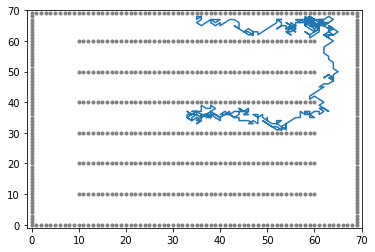

In [7]:

x_visited, y_visited = run_walk()
plt.plot(x_visited, y_visited)

plt.xlim(-1,n)
plt.ylim(-1,n)
plt.scatter([i for i in range(n) for j in range(n) if is_exit( (i,j) )],
            [j for i in range(n) for j in range(n) if is_exit( (i,j) )],
            color='grey', marker='.'
           )
plt.show()


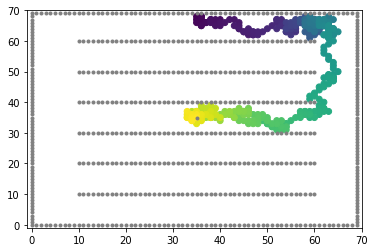

In [8]:

plt.scatter(x_visited, y_visited,
            c=[i for i in range(len(x_visited))])

plt.scatter([i for i in range(n) for j in range(n) if is_exit( (i,j) )],
            [j for i in range(n) for j in range(n) if is_exit( (i,j) )],
            color='grey', marker='.'
           )
plt.xlim(-1,n)
plt.ylim(-1,n)

plt.show()